In [ ]:
"""
SELECT players.username, team, level_index, score
  FROM players
  JOIN highscores ON players.username=highscores.username
  INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/foo.txt';
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spstats
import random
%matplotlib inline

In [ ]:
star_thresholds = {
    1: None,
    2: (920, 1000),
    3: (1100, 1900),
    4: (2000, 2800),
    5: (1000, 1500),
    6: (700, 750),
    7: (885, 1080),
    8: (850, 900),
    9: (1650, 1700),
    10: (1000, 1100),
    11: (1300, 1500),
    12: (1200, 1500),
    13: (3000, 4000),
    14: (950, 1000),
    15: (950, 1000),
    16: (1300, 1600),
    17: (970, 1000),
    18: (3800, 4200)
}

In [3]:
rows = []
with open('highscores.txt') as f:
    for line in f:
        name,team,level,score = line.split('\t')
        team = int(team)
        level = int(level)
        score = int(score)
        if level not in star_thresholds.keys() or team < 0:
            continue
        
        if level==1:
            stars = 0
        else:
            t2,t3 = star_thresholds[level]
            stars = 3 if score >= t3 else 2 if score >= t2 else 1
        
        rows.append([name, team, level, score, stars])
        
df = pd.DataFrame(rows, columns=['username','team','level','score','stars'])
df.head()

,username,team,level,score,stars
0,135Mallos,0,1,0,0
1,135Mallos,0,2,1003,3
2,135Mallos,0,3,1931,3
3,135Mallos,0,4,2896,3
4,135Mallos,0,5,1010,2


/home/jz/.local/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/jz/.local/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


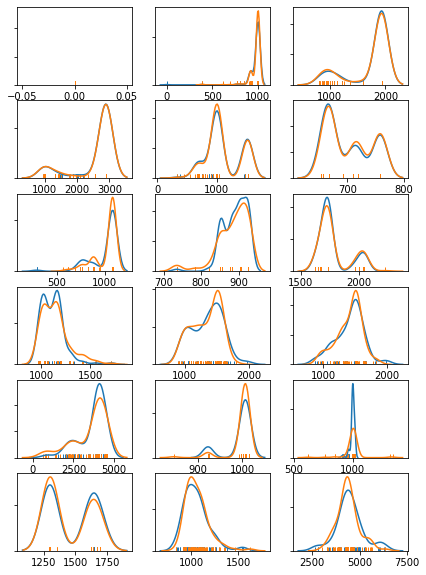

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(7,10))
levels_grouped = df.groupby('level')
for level_idx in range(1,19):
    df_level = levels_grouped.get_group(level_idx)
    score0 = list(df_level.loc[df_level['team'] == 0]['score'])
    score1 = list(df_level.loc[df_level['team'] == 1]['score'])
    
    i = level_idx-1
    ax = axes[(i//3,i%3)]
    ax.set_yticklabels([])
    
    def foo(ax, hist, kde, rug):
        sns.distplot(score0, ax=ax, hist=hist, kde=kde, rug=rug)
        sns.distplot(score1, ax=ax, hist=hist, kde=kde, rug=rug)
    foo(ax, False, True, True)

In [46]:
grouped = df.groupby('username')
stars = grouped['stars'].sum()
teams = grouped['team'].first()
progress = grouped['level'].max()

In [47]:
users = []
for name,star in stars.items():
    team = teams[name]
    prog = progress[name]
    users.append([name,team,star,prog])

df2 = pd.DataFrame(users, columns=['username','team','stars','progress'])
df2.head()

,username,team,stars,progress
0,135Mallos,0,11,5
1,1791,1,39,17
2,3Boymomma,0,10,5
3,3lisz,0,33,14
4,ACook,1,2,3


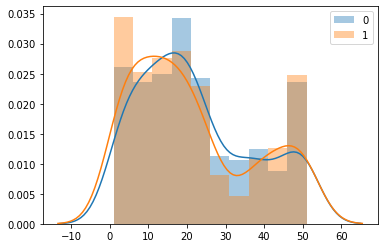

In [87]:
stars0 = list(df2.loc[df2['team'] == 0]['stars'])
stars1 = list(df2.loc[df2['team'] == 1]['stars'])

sns.distplot(stars0, bins=10)
sns.distplot(stars1, bins=10)
plt.legend([0,1])

In [88]:
print(len(stars0), len(stars1))

321 348


In [120]:
spstats.wilcoxon(stars0, random.sample(stars1, len(stars0)))

WilcoxonResult(statistic=22645.5, pvalue=0.22956702700207787)